<a href="https://colab.research.google.com/github/Barissdal/TimeSeriesCrostonMethod/blob/main/Croston's_Prediction_Y%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Croston's Methodu

##Özet

Bu method bir mağazaya gelen müşteri sayısını, bir vergi dairesine gelen mükellef sayısı gibi veri uzayının belirli kalıplar arasında olabilecek durumlar için geliştirilmiş bir yöntemdir.

Verilerimiz 0,1,2... gibi küçük sayılardan oluşuyorsa negatif sayı içermeyen tam sayılardan oluşan bir örnek uzayı için daha uygun olan bir tahmin yöntemine ihtiyaç duyulduğu için geliştirilmiştir.

Bu yöntem ile 0 değeri içeren zaman dilimleri ile 0 değeri içermeyen zaman dilimleri dikkate alınarak orjinal zaman serisinden iyi yeni seri oluşturulmaktadır.

Serilerden genel çalışma mantığı aşağıdaki görselde gösterilmektedir

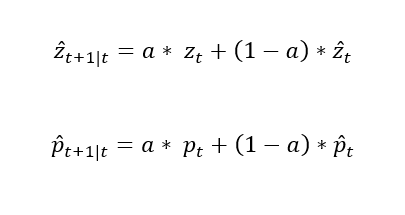

Burada z demand olarak adlandırılan t zamanındaki 0 değer içermeyen miktarlar için kullanılan rassal değişken, p değişkeni ise t ile t-1 zamanlarındaki gözlemlenen 0'dan farklı miktarlar için geçen süreyi belirtmektedir.

a değeri ise Simple Exponential Smoothing mantığıyla kullanılmaktadır. 

Buradaki tahmin değerleri ise z rassal değişkenin tuttuğu değer ile p rassal değişkenlerinin tuttuğu değerlerin oranlanması ile hesaplanmaktadır.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.array([4,10,0,0,2,3,7,0,1,1,5,9,2,0,3,7,1,1,0,3,2,0,0])
print(x)

[ 4 10  0  0  2  3  7  0  1  1  5  9  2  0  3  7  1  1  0  3  2  0  0]


In [26]:
z = x[x != 0]
print('Demand, z: ', z)

Demand, z:  [ 4 10  2  3  7  1  1  5  9  2  3  7  1  1  3  2]


In [27]:
p_idx = np.flatnonzero(x)
print('Index: ', p_idx)

Index:  [ 0  1  4  5  6  8  9 10 11 12 14 15 16 17 19 20]


In [28]:
p = np.diff(p_idx, prepend=-1)
print('Period, p: ', p)

Period, p:  [1 1 3 1 1 2 1 1 1 1 2 1 1 1 2 1]


In [29]:
alpha = 0.3
n = len(z)
z_hat = np.zeros(n)
p_hat = np.zeros(n)
z_hat[0] = z[0]
p_hat[0] = np.mean(p)

In [30]:
for i in range(1,n):
    z_hat[i] = alpha*z[i] + (1-alpha)*z_hat[i-1]
    p_hat[i] = alpha*p[i] + (1-alpha)*p_hat[i-1]

In [31]:
print('Smoothed Demand, z_hat: ', np.round(z_hat,2))
print('Smoothed Period, p_hat: ',np.round(p_hat,2))

Smoothed Demand, z_hat:  [4.   5.8  4.66 4.16 5.01 3.81 2.97 3.58 5.2  4.24 3.87 4.81 3.67 2.87
 2.91 2.63]
Smoothed Period, p_hat:  [1.31 1.22 1.75 1.53 1.37 1.56 1.39 1.27 1.19 1.13 1.39 1.28 1.19 1.14
 1.39 1.28]


In [32]:
y_hat = z_hat / p_hat
print('Forecast: ', np.round(y_hat, 2))

Forecast:  [3.05 4.76 2.66 2.73 3.66 2.44 2.13 2.81 4.37 3.74 2.78 3.77 3.07 2.53
 2.08 2.06]


In [33]:
m = len(x) + 1
forecast = np.empty(m)
forecast[:] = np.nan
forecast[p_idx+1] = y_hat

# Forward fill missing values with previous forecast
for i in range(1,m):
    if np.isnan(forecast[i]):
        forecast[i] = forecast[i-1]

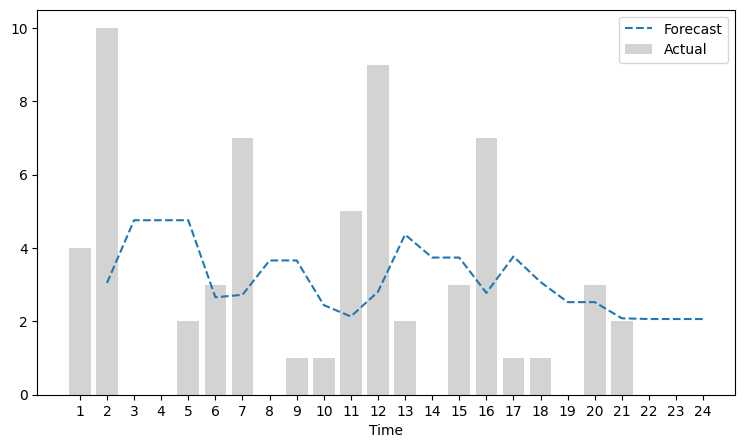

In [34]:
fig, ax = plt.subplots(figsize=(9,5))
plt.bar(np.arange(1,m), x, color='lightgrey', label='Actual')
plt.plot(np.arange(1,m+1), forecast, linestyle='--', label='Forecast')
plt.xticks(np.arange(1,m+1))
plt.xlabel('Time')
plt.legend()
plt.show()

#Bir Diğer Yaklaşım Error Metrics for Intermittent Demand

In [57]:
demand = np.array([12,
6,
10,
7,
7,
8,
6,
0,
3,
10,
20,
17,
3,
3,
21,
23,
23,
23,
16,
26,
15,
18,
23,
20])

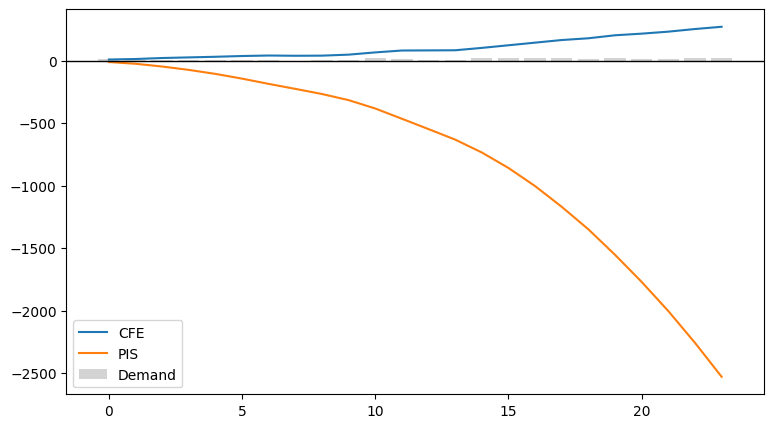

In [58]:
# Example
forecast = np.array([2] * 24)
CFE = np.cumsum(demand - forecast)
PIS = -np.cumsum(CFE)

# Plot the results
fig, ax = plt.subplots(figsize=(9,5))
plt.bar(np.arange(24), demand, color='lightgrey', label='Demand')
plt.plot(CFE, label='CFE')
plt.plot(PIS, label='PIS')
plt.axhline(0, lw=1, color='black')
plt.legend()
plt.show()

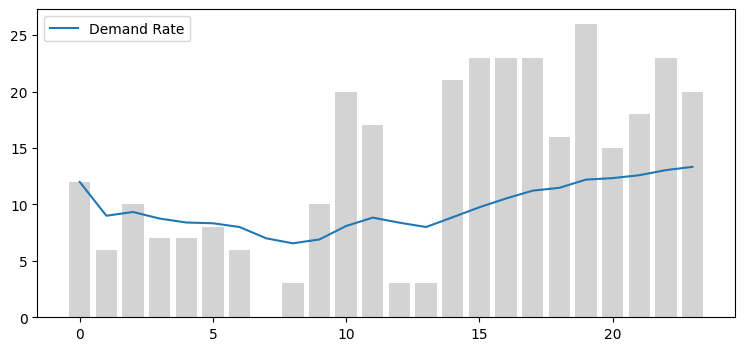

In [59]:
# Example of demand rate
n = len(demand)
demand_rate = np.cumsum(demand) / np.arange(1,n+1)

fig, ax = plt.subplots(figsize=(9,4))
plt.bar(np.arange(0,n), demand, color='lightgrey')
plt.plot(demand_rate, label='Demand Rate')
plt.legend()
plt.show()

Parameter Selection for Croston's Method

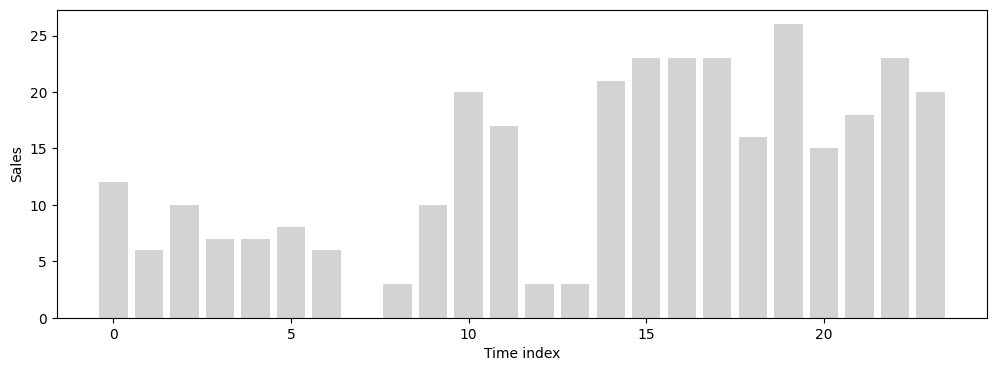

In [60]:
# Plot sales series
plt.figure(figsize=(12,4))
plt.bar(np.arange(24), demand, color='lightgrey')
plt.xlabel('Time index')
plt.ylabel('Sales')
plt.show()

In [62]:
def croston(ts, alpha=0.1):  
    """
    Perform Croston's method on a time series, ts, and return
    a forecast
    
    Parameters
    ----------
    ts : (N,) array_like
        1-D input array
    alpha : float
        Smoothing factor, `0 < alpha < 1`, default = 0.1
        
    Returns
    -------
    forecast : (N+1,) ndarray
        1-D array of forecasted values
    """
    # Initialise arrays for demand, z, and period, p. Starting
    # demand is first non-zero demand value, starting period is
    # mean of all demand intervals
    ts_trim = np.trim_zeros(ts, 'f')
    n = len(ts_trim)
    z = np.zeros(n)
    p = np.zeros(n)
    p_idx = np.flatnonzero(ts)
    p_diff = np.diff(p_idx, prepend=-1)
    p[0] = np.mean(p_diff)
    z[0] = ts[p_idx[0]]
    q = 1
    for i in range(1,n):
        if ts_trim[i] > 0:
            z[i] = alpha*ts_trim[i] + (1-alpha)*z[i-1]
            p[i] = alpha*q + (1-alpha)*p[i-1]
            q = 1
        else:
            z[i] = z[i-1]
            p[i] = p[i-1]
            q += 1 
    f = z / p
    nan_arr = [np.nan] * (len(ts)-n+1)
    return np.concatenate((nan_arr, f))

In [63]:
from scipy.spatial.distance import sqeuclidean

def error(ts, forecast):
    """
    Return a dictionary of error metrics
    """
    cfe = np.cumsum(ts - forecast)
    cfe_max_idx = np.abs(cfe).argmax()
    pis = -np.cumsum(cfe)
    n = len(ts)
    d_rate = np.cumsum(ts) / np.arange(1,n+1)  # Demand rate
    trim = int(n*0.1)    # Number to trim from start of demand rate, ie 10% 
    err = {
        'MAE': np.sum(np.abs(ts - forecast))/n,
        'MSE': sqeuclidean(ts, forecast)/n,
        'MSR': sqeuclidean(d_rate[trim:], forecast[trim:])/(n-trim),   
        'CFE': cfe[-1],    
        'CFE_MAX': np.max(cfe),
        'CFE_MIN': np.min(cfe),
        'NOS': len(cfe[cfe>0]),
        'PIS': pis[-1],
    }
    return err

In [64]:
import pandas as pd

alphas = np.arange(0,1.05,0.05)
df = pd.DataFrame([])

for a in alphas:
    forecast = croston(demand, alpha=a)
    idx = np.argmax(np.isfinite(forecast)) # Index of first non-NaN value 
    err = error(demand[idx:], forecast[idx:-1])
    err = pd.DataFrame(err, index=[a])
    df = pd.concat([df, err], axis=0)

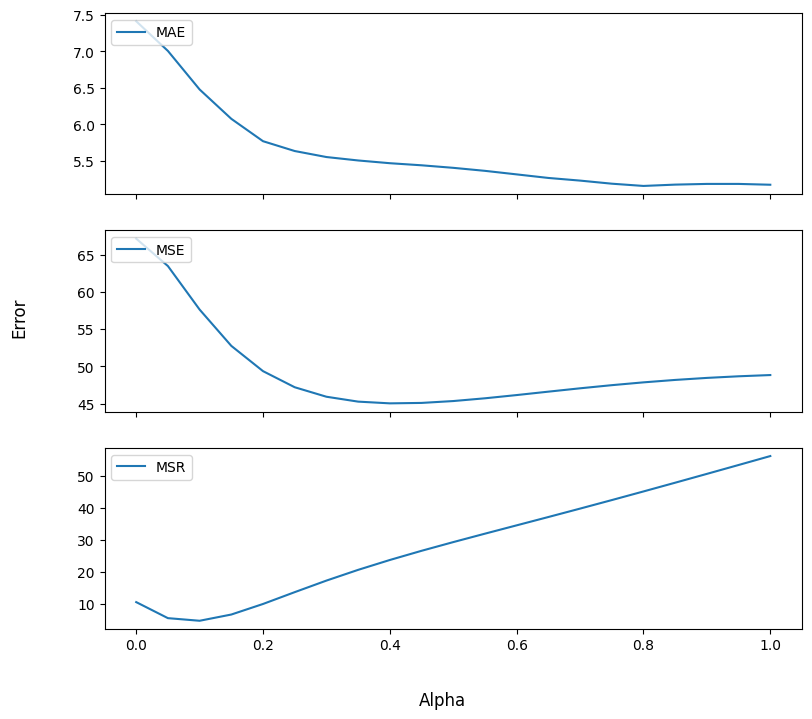

In [65]:
metrics = ['MAE', 'MSE', 'MSR']
fig, axs = plt.subplots(nrows=3, figsize=(9,8), sharex=True)
for i, m in enumerate(metrics):
    df[m].plot(ax=axs[i], legend=m)
    axs[i].legend(loc="upper left")
fig.supxlabel('Alpha')
fig.supylabel('Error')
plt.show()

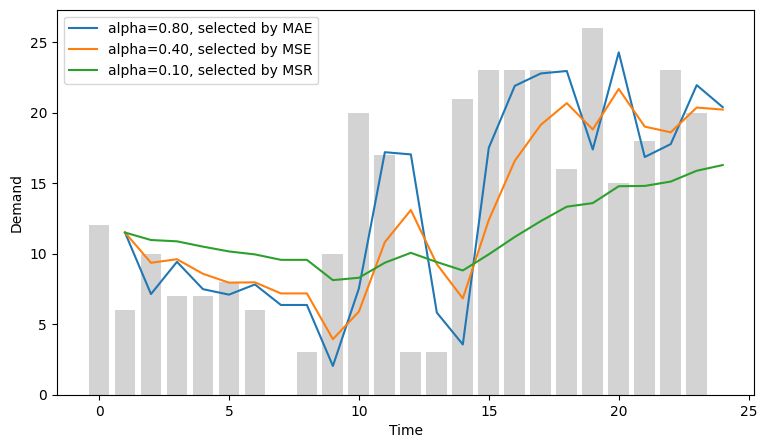

In [66]:
fig, ax = plt.subplots(figsize=(9,5))
for m in metrics:
    alpha_min = df[m].abs().idxmin()
    forecast = croston(demand, alpha_min)
    l = f'alpha={alpha_min:.2f}, selected by {m}'
    plt.plot(forecast, label=l)
plt.bar(np.arange(len(demand)), demand, color='lightgrey')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

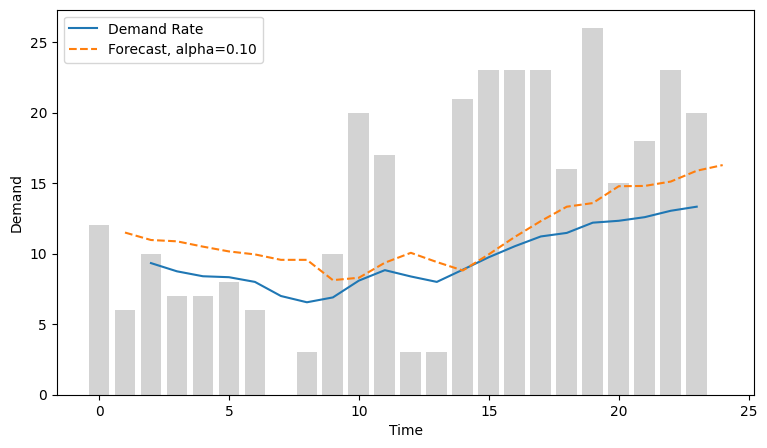

In [67]:
# Construct demand rate array
d_rate = np.cumsum(demand) / np.arange(1,len(demand)+1)
trim = int(len(demand)*0.1)  # Trim % from the start of d_rate

# Plot results
alpha_min = df['MSR'].abs().idxmin()
fig, ax = plt.subplots(figsize=(9,5))
plt.bar(np.arange(len(demand)), demand, color='lightgrey')
plt.plot(np.arange(trim,len(demand)), d_rate[trim:], 
         label='Demand Rate')
plt.plot(croston(demand, alpha_min), linestyle='--', 
         label=f'Forecast, alpha={alpha_min:.2f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

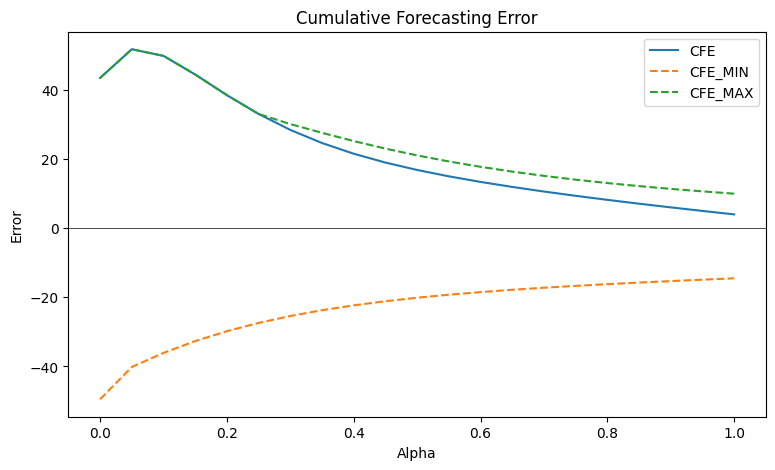

In [68]:
fig, axs = plt.subplots(figsize=(9,5))
plt.plot(df['CFE'], label='CFE')
plt.plot(df['CFE_MIN'], linestyle='--', label='CFE_MIN')
plt.plot(df['CFE_MAX'], linestyle='--', label='CFE_MAX')
plt.axhline(linewidth=0.5, color='black')
plt.legend()
plt.title('Cumulative Forecasting Error')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.show()

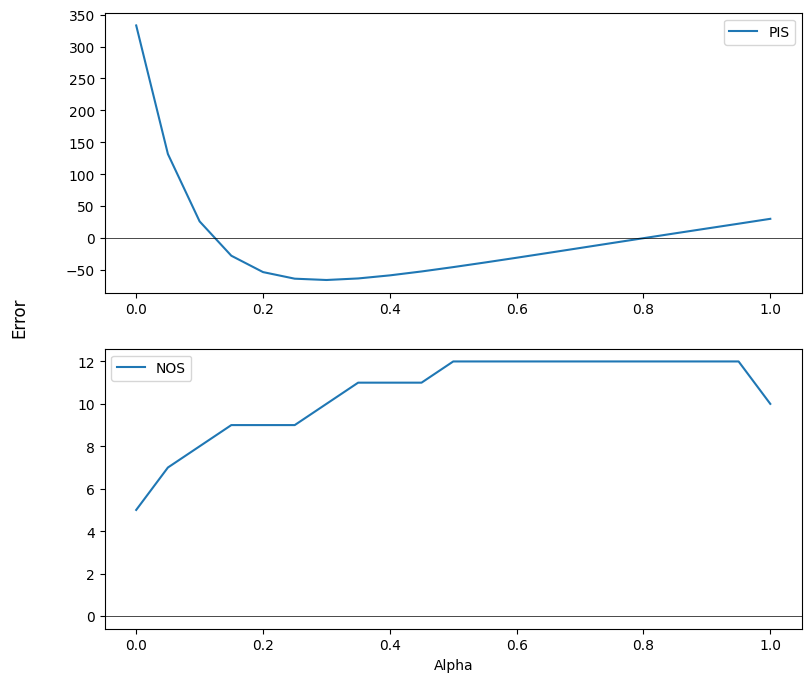

In [69]:
metrics = ['PIS', 'NOS']
fig, axs = plt.subplots(nrows=2, figsize=(9,8))
for i, m in enumerate(metrics):
    axs[i].plot(df[m], label=m)
    axs[i].axhline(linewidth=0.5, color='black')
    axs[i].legend()
plt.xlabel('Alpha')
fig.supylabel('Error')
plt.show()

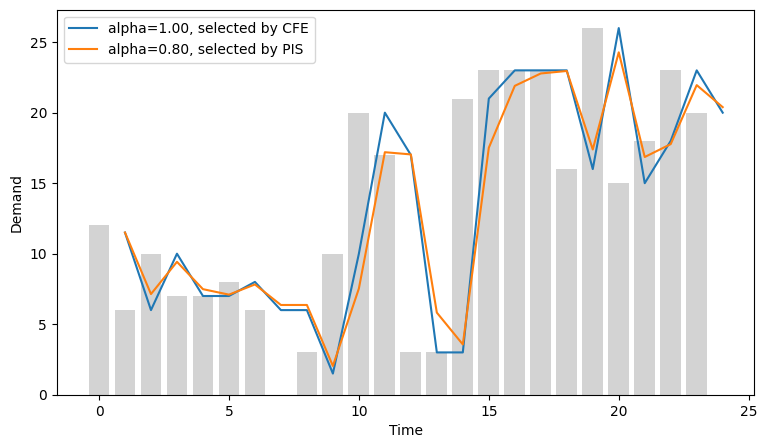

In [70]:
metrics = ['CFE', 'PIS']
fig, ax = plt.subplots(figsize=(9,5))
for m in metrics:
    alpha_min = df[m].abs().idxmin()
    forecast = croston(demand, alpha_min)
    l = f'alpha={alpha_min:.2f}, selected by {m}'
    plt.plot(forecast, label=l)
plt.bar(np.arange(len(demand)), demand, color='lightgrey')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

In [72]:
df.tail(5)

,MAE,MSE,MSR,CFE,CFE_MAX,CFE_MIN,NOS,PIS
0.80,5.157418,47.864613,45.245215,8.212361,13.071610,-16.191229,12,-0.335865
0.85,5.175548,48.192066,47.993387,7.100225,12.188322,-15.733112,12,7.283321
0.90,5.185167,48.464375,50.766795,6.034785,11.392513,-15.302672,12,14.839792
0.95,5.185125,48.681523,53.558245,5.005870,10.669352,-14.893401,12,22.371303
1.00,5.173913,48.847826,56.366727,4.000000,10.000000,-14.500000,10,30.000000
